**Boruta installation -** Boruta needs to be installed in order to do the feature selection using BorutaPy

In [ ]:
pip install boruta

**Import all necessary libraries**

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition, datasets
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from boruta import BorutaPy

In [ ]:
#Read the dataset
df = pd.read_csv("city_day.csv")
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


**Exploratory Data Analysis**

In [ ]:
print ('Rows with no. of missing values:')
print()
print(df.isna().sum())

Rows with no. of missing values:

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [ ]:
#Information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


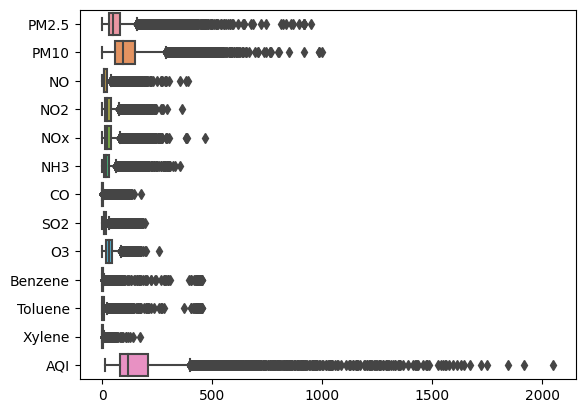

In [ ]:
#Outliers
sns.boxplot(data=df[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI' ]], orient='h')
plt.show()

<ipython-input-53-e78acc7bc663>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'magma')


<Axes: >

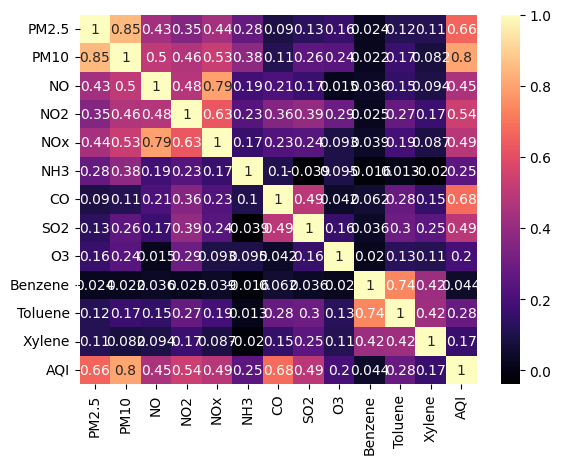

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap = 'magma')

**Data Cleaning**

In [ ]:
#Dropping attribute that do not contribute to the findings
df.drop(['AQI_Bucket'], axis=1, inplace = True)
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0


In [ ]:
# #Drop the rows with null values as the number of missing values not large enough to affect the size of the dataset
df2 = df.dropna()
df2.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
2123,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0
2124,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0
2125,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0
2126,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0
2127,Amaravati,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0


In [ ]:
#convert the values to 32-bit integer data type
df2['PM2.5'] = df2['PM2.5'].apply(np.int32)
df2['PM10'] = df2['PM10'].apply(np.int32)
df2['NO'] = df2['NO'].apply(np.int32)
df2['NO2'] = df2['NO2'].apply(np.int32)
df2['NOx'] = df2['NOx'].apply(np.int32)
df2['NH3'] = df2['NH3'].apply(np.int32)
df2['CO'] = df2['CO'].apply(np.int32)
df2['SO2'] = df2['SO2'].apply(np.int32)
df2['O3'] = df2['O3'].apply(np.int32)
df2['Benzene'] = df2['Benzene'].apply(np.int32)
df2['Toluene'] = df2['Toluene'].apply(np.int32)
df2['Xylene'] = df2['Xylene'].apply(np.int32)
df2['AQI'] = df2['AQI'].apply(np.int32)

<ipython-input-56-2ccdcef6b3a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PM2.5'] = df2['PM2.5'].apply(np.int32)
<ipython-input-56-2ccdcef6b3a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PM10'] = df2['PM10'].apply(np.int32)
<ipython-input-56-2ccdcef6b3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
#Label Encoding done to attribute 'City'
le = LabelEncoder()
df2['City'] = le.fit_transform(df2['City'])
df2

<ipython-input-57-f85172a02389>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['City'] = le.fit_transform(df2['City'])


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
2123,0,2017-11-25,81,124,1,20,12,10,0,15,127,0,6,0,184
2124,0,2017-11-26,78,129,1,26,14,10,0,26,117,0,7,0,197
2125,0,2017-11-27,88,135,6,30,21,12,0,33,111,0,7,0,198
2126,0,2017-11-28,64,104,2,28,17,11,0,19,138,0,5,0,188
2127,0,2017-11-29,72,114,5,23,16,12,0,10,109,0,4,0,173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,8,2020-06-26,7,32,5,23,17,11,0,6,19,1,5,1,47
29526,8,2020-06-27,15,50,7,25,19,12,0,8,23,2,12,0,41
29527,8,2020-06-28,24,74,3,26,16,11,0,12,30,0,2,0,70
29528,8,2020-06-29,22,65,3,29,18,10,0,8,30,0,0,0,68


In [ ]:
y = df2['CO']
X = df2.drop(['CO','Date'] , 1)
colnames = X.columns

<ipython-input-58-fe1be915c41f>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df2.drop(['CO','Date'] , 1)


In [ ]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [ ]:
rf = RandomForestClassifier(n_jobs=-1,class_weight="balanced",max_depth = 5)

feat_selector=BorutaPy(rf,n_estimators="auto",random_state = 1)

feat_selector.fit(X.values,y.values.ravel())
# sort the boruta score descending

boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score",ascending= False)

In [ ]:
print('---------Top 10----------')
# your codes here...
display(boruta_score.head(10))

print('---------Bottom 10----------')
# your codes here...
boruta_score.tail(10)

---------Top 10----------


,Features,Score
1,PM2.5,1.00
2,PM10,1.00
3,NO,1.00
5,NOx,1.00
12,AQI,1.00
6,NH3,0.88
9,Benzene,0.75
7,SO2,0.62
8,O3,0.62
4,NO2,0.38


---------Bottom 10----------


,Features,Score
5,NOx,1.00
12,AQI,1.00
6,NH3,0.88
9,Benzene,0.75
7,SO2,0.62
8,O3,0.62
4,NO2,0.38
10,Toluene,0.25
11,Xylene,0.12
0,City,0.00


In [ ]:
predictors = ['PM2.5','PM10','NO','NOx','AQI','NH3','Benzene','SO2','O3','NO2','Toluene','Xylene']
X = df2[predictors]
y = df2['CO']
colnames = X.columns

In [ ]:
# Splitting the dataset into training and testing set (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#**Decision Tree Regression**

In [ ]:
#imports packages used for making decision tree and tuning its hyperparameters
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score

In [ ]:
UntunedDecisionTree=DecisionTreeRegressor()
UntunedDecisionTree.fit(X_train,y_train)
dtr_prediction = UntunedDecisionTree.predict(X_test)

In [ ]:
print('MAE Test:', metrics.mean_absolute_error(y_test,dtr_prediction))
print('RMSE Test:', np.sqrt(metrics.mean_squared_error(y_test, dtr_prediction)))
print('R^2:',r2_score(y_test, dtr_prediction))

MAE Test: 0.3067878140032068
RMSE Test: 1.0931984464859306
R^2: 0.34998505304150407


In [ ]:
r2_dt= r2_score(y_test, dtr_prediction)
N = len(y_test)
k = 3
r2_dts_3 = (1-r2_dt)*(N-1)/(N-k-1)
print('Adjusted R-Squared =',r2_dts_3)

Adjusted R-Squared = 0.6510594273231856


In [ ]:
r2_dt= r2_score(y_test, dtr_prediction)
N = len(y_test)
k = 6
r2_dts_6 = (1-r2_dt)*(N-1)/(N-k-1)
print('Adjusted R-Squared =',r2_dts_6)

Adjusted R-Squared = 0.6521072697491349


In [ ]:
r2_dt= r2_score(y_test, dtr_prediction)
N = len(y_test)
k = 9
r2_dts_9 = (1-r2_dt)*(N-1)/(N-k-1)
print('Adjusted R-Squared =',r2_dts_9)

Adjusted R-Squared = 0.6531584904956408


### Tuning the Model by optimizing Hyperparameters utilizing GridSearchCV

In [ ]:
#Grid of parameters of DecisionTreeRegression() and their respective values
#Parameters with input values of type Int or Float have values chosen randomly to be put in the grid. Value is then updated/replaced based on optimal value of last iteration
#Parameters with a small fixed set of values such as 'max_features' and 'criterion' have all values included in the grid
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html - List of parameters for DecisionTreeRegressor() function

param_grid = {'max_depth': [23,24,25,26],                                  #Max Depth of 26 as data originally had 26 features before being cut
              'min_samples_split': [14,15,16,17],                          #min samples for decision node to avoid overfitting
              'min_samples_leaf': [5,6,8,10],                              #min amount of samples in leaf node to avoid overfitting
              'max_features':[2,5,8],                                      #max number of unique features for leaf node
              'criterion':["squared_error","friedman_mse", "entropy"],
              'min_impurity_decrease': [0.2, 0.4, 0.6, 0.8]}               #min impurity measure to maximise information gain

#Tuning model so that the decision tree doesnt overfit or underfit
#Uses the param_grid defined and iterates through every single combination to find best possible
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

DTR_TunedModel = GridSearchCV(DecisionTreeRegressor(),
                   param_grid,
                   cv=3, n_jobs=-1, verbose=2, pre_dispatch='2*n_jobs')
DTR_TunedModel.fit(X_train,y_train)

Fitting 3 folds for each of 2304 candidates, totalling 6912 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2304 fits failed out of a total of 6912.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1204 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'entropy'],
                         'max_depth': [23, 24, 25, 26],
                         'max_features': [2, 5, 8],
                         'min_impurity_decrease': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [5, 6, 8, 10],
                         'min_samples_split': [14, 15, 16, 17]},
             verbose=2)

In [ ]:
DTR_TunedModel.best_estimator_, DTR_TunedModel.best_params_, DTR_TunedModel.best_score_

(DecisionTreeRegressor(criterion='friedman_mse', max_depth=26, max_features=8,
                       min_impurity_decrease=0.8, min_samples_leaf=10,
                       min_samples_split=15),
 {'criterion': 'friedman_mse',
  'max_depth': 26,
  'max_features': 8,
  'min_impurity_decrease': 0.8,
  'min_samples_leaf': 10,
  'min_samples_split': 15},
 0.5009243072874695)

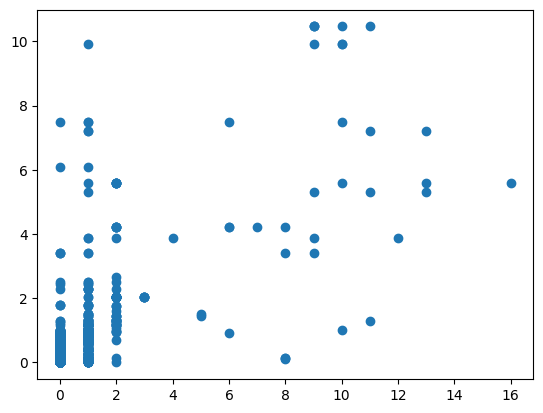

In [ ]:
dtr_tuned_prediction = DTR_TunedModel.predict(X_test)
plt.scatter(y_test, dtr_tuned_prediction)

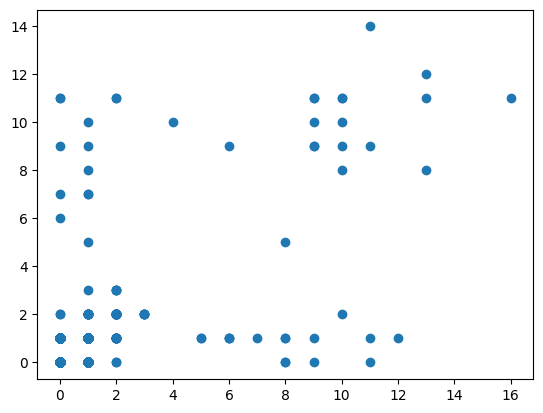

In [ ]:
#plot of untuned model prediction for comparison
plt.scatter(y_test, dtr_prediction)

In [ ]:
print('MAE Test:', metrics.mean_absolute_error(y_test,dtr_tuned_prediction))
print('RMSE Test:', np.sqrt(metrics.mean_squared_error(y_test,dtr_tuned_prediction)))
print('R^2:',r2_score(y_test,dtr_tuned_prediction))

MAE Test: 0.3303443188743043
RMSE Test: 0.9690438676171536
R^2: 0.4892454941166826


# **Support Vector Regression**

In [ ]:
from sklearn.metrics import mean_squared_error
import math

In [ ]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [ ]:
y_pred = svr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
print('MAE Test:', metrics.mean_absolute_error(y_test,y_pred))
print('RMSE Test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:',r2_score(y_test, y_pred))

MAE Test: 0.3397762559953118
RMSE Test: 1.1584483192307011
R^2: 0.27007429310249675


In [ ]:
from sklearn.metrics import r2_score
r2_svr = r2_score(y_test, y_pred)
N = len(y_test)
k = 3
r2_svr_3 = (1-r2_svr)*(N-1)/(N-k-1)
print('Adjusted R-Squared =', r2_svr_3)

Adjusted R-Squared = 0.7310985923397595


In [ ]:
from sklearn.metrics import r2_score
r2_svr = r2_score(y_test, y_pred)
N = len(y_test)
k = 6
r2_svr_6= (1-r2_svr)*(N-1)/(N-k-1)
print('Adjusted R-Squared =', r2_svr_6)

Adjusted R-Squared = 0.7322752531643407


In [ ]:
r2_svr = r2_score(y_test, y_pred)
N = len(y_test)
k = 9
r2_svr_9 = (1-r2_svr)*(N-1)/(N-k-1)
print('Adjusted R-Squared =', r2_svr_9)

Adjusted R-Squared = 0.7334557076294095


### Tuning the Model by optimizing Hyperparameters utilizing GridSearchCV

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from numpy import arange

In [ ]:
# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
search.fit(X_train,y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])},
             scoring='neg_mean_absolute_error')

In [ ]:
search.best_params_

{'alpha': 0.99}

In [ ]:
predictions_MLR = search.predict(X_test)

In [ ]:
print('MAE Test:', metrics.mean_absolute_error(y_test,predictions_MLR))
print('RMSE Test:', np.sqrt(metrics.mean_squared_error(y_test,predictions_MLR)))
print('R^2:',r2_score(y_test,predictions_MLR))

MAE Test: 0.5387021418538219
RMSE Test: 1.0936638029530295
R^2: 0.34943153406705607


# **Deep Learning Model - Convolutional Neural Networks (CNN)**

In [ ]:
pip install keras-tuner -q

In [ ]:
#import required TensorFlow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter

**Building the model and tuning the  Hyperparameters using KerasTuner**

In [ ]:
#Standardize the input features
scaler = StandardScaler()

X = scaler.fit_transform(df2[predictors])
y = df2['CO']

#Define the model
def build_model(hp):
  model = Sequential()

  #Tuning the no. of units in the 2 dense layers
  hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)
  model.add(Dense(units = hp_units, activation = 'relu'))

  hp_units = hp.Int('units', min_value = 32, max_value = 256, step = 32)
  model.add(Dense(units = hp_units, activation = 'relu'))

  #Output layer with linear activation function for regression
  model.add(Dense(1, activation = 'linear'))

  #Tuning the learning rate for the optimizer
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

  model.compile(loss = 'mean_absolute_error', optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate))

  return model

#Initializing the tuner using RandomSearch
tuner = RandomSearch(
    build_model,
    objective = 'val_loss',
    max_trials = 10,
    directory = 'tuner_dir',
    project_name = 'co_tuner'
)

#Hyperparameter search
tuner.search(X_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.3)

#Obtain the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials = 1)[0]

#Final model with best hyperparameters
final_model = build_model(best_hp)

final_model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.3)

#Evaluate final model performance using MAE, RMSE & R^2 values

#Prediction of target values using the final model
y_pred = final_model.predict(X_test)

mae = final_model.evaluate(X_test, y_test)
print(f'Test MAE: {mae}')

#RMSE Calculation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE: {rmse}')

#R^2 Value Calculation
r2 = r2_score(y_test, y_pred)
print(f'Test R^2: {r2}')


Reloading Tuner from tuner_dir/co_tuner/tuner0.json
Epoch 1/10
96/96 [==============================] - 2s 7ms/step - loss: 5.4047 - val_loss: 0.4427
Epoch 2/10
96/96 [==============================] - 0s 4ms/step - loss: 0.3814 - val_loss: 0.4198
Epoch 3/10
96/96 [==============================] - 1s 5ms/step - loss: 0.3798 - val_loss: 0.4157
Epoch 4/10
96/96 [==============================] - 0s 4ms/step - loss: 0.3795 - val_loss: 0.4064
Epoch 5/10
96/96 [==============================] - 0s 4ms/step - loss: 0.3720 - val_loss: 0.4083
Epoch 6/10
96/96 [==============================] - 0s 4ms/step - loss: 0.3626 - val_loss: 0.4097
Epoch 7/10
96/96 [==============================] - 0s 3ms/step - loss: 0.3534 - val_loss: 0.3940
Epoch 8/10
96/96 [==============================] - 0s 4ms/step - loss: 0.3611 - val_loss: 0.3943
Epoch 9/10
96/96 [==============================] - 0s 3ms/step - loss: 0.3555 - val_loss: 0.3886
Epoch 10/10
59/59 [==============================] - 0s 4ms/step -